In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("data/census_cities.csv")

In [3]:
seg_score = data.iloc[:,19:22]
race_ratio = data.iloc[:,16:19]

In [4]:
np_seg = np.array(seg_score)
np_rac = np.array(race_ratio)

In [5]:
dep_var = np.sum(np_seg*np_rac, axis = 1)

In [6]:
mean_dep = np.mean(dep_var, axis = 0)
std_dep = np.std(dep_var, axis=0)
dep_var = (dep_var - mean_dep ) / std_dep

In [7]:
#Drop the X variables: Race ratio, Dissimilarity index, Income inequality
mul_var = data.drop(columns = [' %Non Hispanic White','%Non Hispanic Black','%Hispanic','%Asian','White-Black dissimilarity index','White-Hispanic dissimilarity index', 'White-Asian dissimilarity index','commute_%carpool','commute_%public transit',' pop_2010','pop_urban area_2010','GDP 2010','Walking Score','total emplpyment','Driving Score','Transit Score','Megaregion','median property value'])
mul_var = mul_var.iloc[:,1:]

In [8]:
mean_mul = np.mean(mul_var, axis = 0)
std_mul = np.std(mul_var, axis=0)
mul_var = (mul_var - mean_mul ) / std_mul

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = mul_var.columns
vif["vif_Factor"] = [variance_inflation_factor(mul_var.values, i) for i in range(mul_var.shape[1])]
vif

,features,vif_Factor
0,urban land area_sq mi,1.657282
1,urban_pop_den_sq mi,4.309890
2,poverty rate,4.666869
3,median household income,6.396561
4,commute_%drive,2.954877
5,%home ownership,3.197277
6,Black_White income inequality,1.523321
7,Hispanic_White income inequality,1.577931


In [10]:
#Run OLS regression with Constant term
mul_var_con = sm.add_constant(mul_var)
ols_reg = sm.OLS(dep_var, mul_var_con).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     13.14
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.57e-09
Time:                        15:40:35   Log-Likelihood:                -37.960
No. Observations:                  49   AIC:                             93.92
Df Residuals:                      40   BIC:                             110.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [11]:
regression = LinearRegression()
regression.fit(mul_var, dep_var)
coefficient = regression.coef_

<BarContainer object of 8 artists>

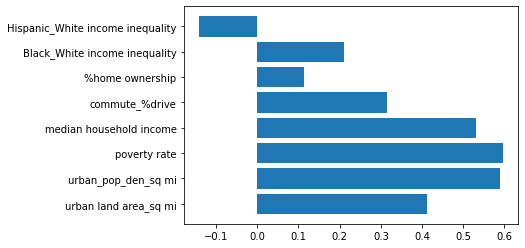

In [12]:
plt.barh(mul_var.columns, np.squeeze(coefficient))

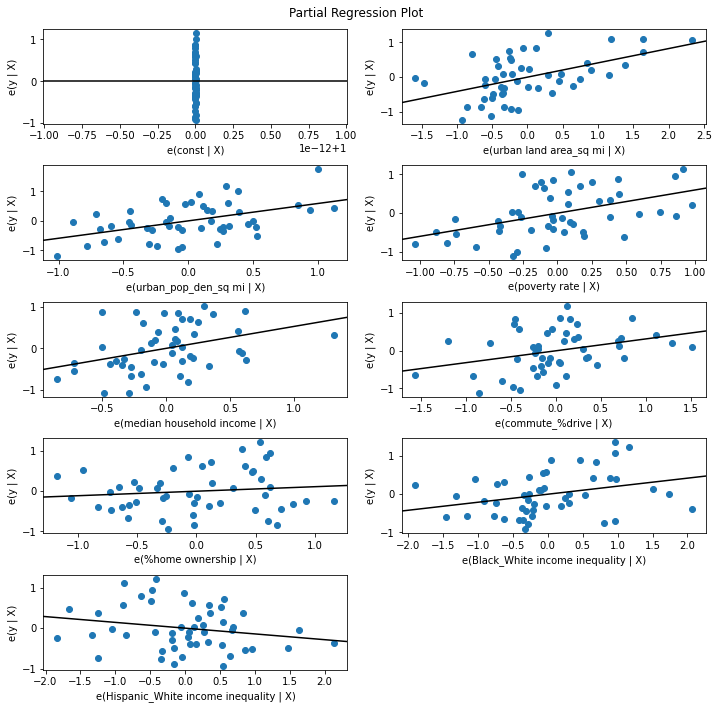

In [13]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

fig = plt.figure(figsize=(10, 10))
plot_partregress_grid(ols_reg, fig=fig)
plt.show()